In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



## Vorlesungsbegleitendes Skript zu Vorlesungseinheit 8


* Jede Zeile entspricht einem Passagier
* Wir bekommen einen ersten Überblick über die Datenstruktur
* Die Spalte Cabin enthält fehlende Werte NaN (Not a Number)

### Output Variable
Survived: 0 = Dead, 1 = Survived --> Output Variable

### Input Variablen (mögliche)
Pclass: Ticket class with 1 = 1st class, 2 = 2nd class, 3 = 3rd class

Sex: Gender of male or female

Age: Age in years

SibSp: Number of siblings/spouses aboard the Titanic

Parch: Number of parents/children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare (Preis)

Cabin: Cabin number

Embarked: Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton

In [64]:
# Datensatz laden
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
# Unerwünschte Spalten entfernen
# Wir entfernen z.B. 'deck', 'embark_town' (redundant zu 'embarked'), 'alive' (redundant zu 'survived'), 'class' (redundant zu 'pclass')
# Zudem 'who', 'adult_male', 'alone', da sie im Entscheidungsbaum nicht nützlich erscheinen
df_clean = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1)

# Fehlende Werte für 'age', 'embarked' und 'fare' entfernen
df_clean = df_clean.dropna(subset=['age', 'embarked', 'fare'])

In [66]:
# Erzeugen von Dummy Variablen je kategorischer Variablen
df_clean = pd.get_dummies(df_clean, columns=['sex', 'embarked'], drop_first=True)
df_clean.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Decision Tree

In [69]:
# Input Variablen
X = df_clean.drop('survived', axis=1)
# Output Variable
y = df_clean['survived']

# Test und Trainingssplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelldefintion ohne Pruning und CV
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# Modellanwendung 
y_pred_train = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))


Accuracy of Decision Tree-Train:  0.9876977152899824
Accuracy of Decision Tree-Test:  0.7202797202797203


[Text(0.4091823340108401, 0.9736842105263158, 'x[5] <= 0.5\ngini = 0.478\nsamples = 569\nvalue = [344, 225]'),
 Text(0.1991869918699187, 0.9210526315789473, 'x[0] <= 2.5\ngini = 0.375\nsamples = 208\nvalue = [52, 156]'),
 Text(0.13279132791327913, 0.868421052631579, 'x[1] <= 56.5\ngini = 0.105\nsamples = 126\nvalue = [7, 119]'),
 Text(0.12195121951219512, 0.8157894736842105, 'x[4] <= 28.856\ngini = 0.091\nsamples = 125\nvalue = [6, 119]'),
 Text(0.0921409214092141, 0.7631578947368421, 'x[4] <= 28.231\ngini = 0.163\nsamples = 56\nvalue = [5, 51]'),
 Text(0.08130081300813008, 0.7105263157894737, 'x[1] <= 27.5\ngini = 0.135\nsamples = 55\nvalue = [4, 51]'),
 Text(0.05420054200542006, 0.6578947368421053, 'x[1] <= 25.5\ngini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(0.032520325203252036, 0.6052631578947368, 'x[4] <= 13.396\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.02168021680216802, 0.5526315789473685, 'x[1] <= 20.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0

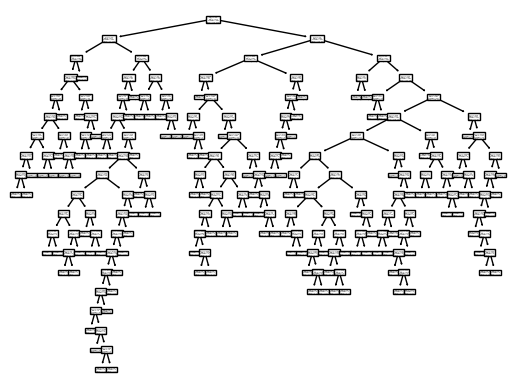

In [71]:
# Plot tree
tree.plot_tree(dtc)

Bestes ccp_alpha durch Cross-Validation: 0.0025155932320204007
Genauigkeit des besten Modells auf dem Testdatensatz: 0.7343


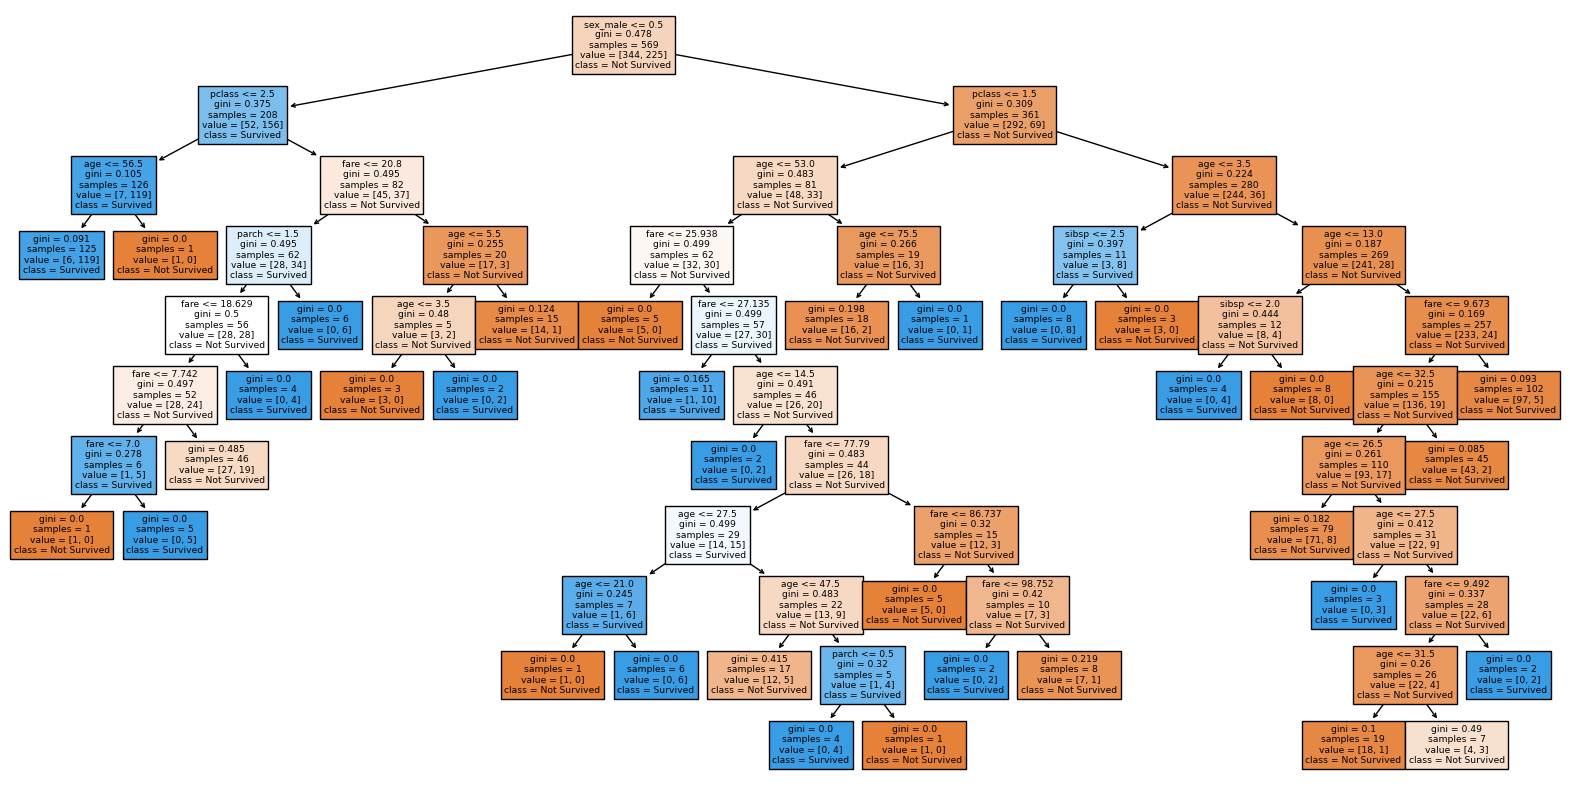

In [86]:
# Ermittlung aller ccp_alpha-Werte durch den Pruning-Pfad
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Verwendung von GridSearchCV zur Bestimmung des besten ccp_alpha-Werts
param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Das beste ccp_alpha ermitteln
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
print(f"Bestes ccp_alpha durch Cross-Validation: {best_ccp_alpha}")

# Modell mit dem besten ccp_alpha trainieren
best_dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
best_dtc.fit(X_train, y_train)

# Vorhersagen und Genauigkeit auf den Testdaten
y_pred = best_dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des besten Modells auf dem Testdatensatz: {accuracy:.4f}")

# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(best_dtc, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.show()

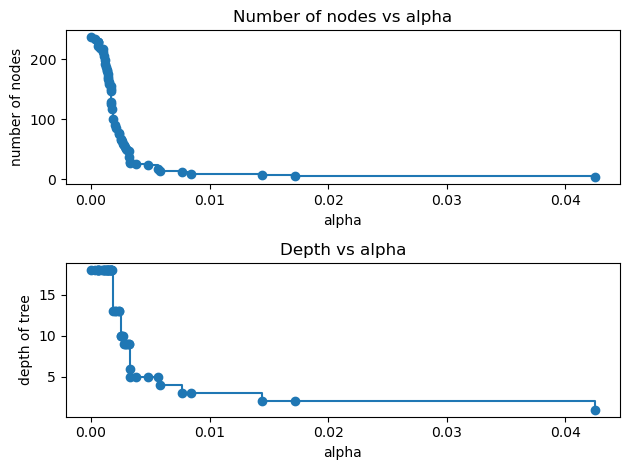

In [88]:
dtcs = dtcs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtc.tree_.node_count for dtc in dtcs]
depth = [dtc.tree_.max_depth for dtc in dtcs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

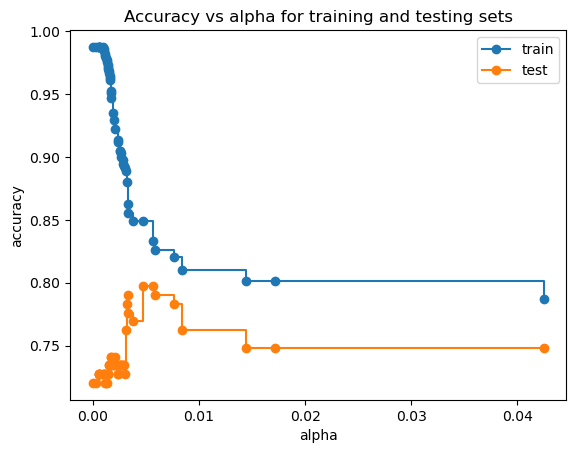

In [89]:
train_scores = [dtc.score(X_train, y_train) for dtc in dtcs]
test_scores = [dtc.score(X_test, y_test) for dtc in dtcs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()